# Data Exploration and Wrangling

#### Importation du csv et transformation au format dataframe pandas

In [45]:
# Importation des librairies
import pandas as pd
import os

# print le dossier de travail
print(os.getcwd())

# export du csv au format dataframe de pandaq
chemin_fichier = "../data/dvf.csv"
df = pd.read_csv(chemin_fichier)

# montre les 5 premières lignes (à utiliser avec Data Wrangler)
df.head()

/Users/theodorefischer/Desktop/ENSTA/IA/IA26/projet-1/notebooks


/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_29371/2035946407.py:10: DtypeWarning: Columns (2,4,5,8,9,10,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-1640327,2022-01-04,1,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.348168,48.88449,000BR
1,2022-1640327,2022-01-04,1,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,...,20.0,2.0,NaN,NaN,NaN,NaN,NaN,2.348168,48.88449,000BR
2,2022-1640327,2022-01-04,1,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,...,25.0,2.0,NaN,NaN,NaN,NaN,NaN,2.348168,48.88449,000BR
3,2022-1640327,2022-01-04,1,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.348168,48.88449,000BR
4,2022-1640328,2022-01-06,1,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,75003.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.362871,48.863374,000AH


In [46]:
# print la forme du data frame
print(df.shape)

# et le type de chaque attribute
print(df.dtypes)

# et le description générale
df.describe(include='all')

(389593, 41)
id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_suffixe                 object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
ancien_code_commune             object
ancien_nom_commune              object
id_parcelle                     object
ancien_id_parcelle              object
numero_volume                   object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
count,389593,389593,389593,389593,384551.0,388151.0,16610,388203,388203,388198.0,...,204073.0,385068.0,41296,41296,780,780,41296,389066,389066,389593
unique,132382,1418,17,7,36360.0,756.0,13,3889,6005,41.0,...,1655.0,43.0,5,5,3,3,1180,51027,46494,160
top,2022-1670285,2022-04-19,1,Vente,300000.0,6.0,B,RUE DE VAUGIRARD,9624,75015.0,...,30.0,0.0,S,sols,IMM,Dépendances d'ensemble immobilier,5442.00,2.4048200,48.8428340,000AR
freq,1976,3439,272449,382096,1542.0,7237.0,12952,2261,2171,29992.0,...,3978.0,146570.0,40267,40267,770,770,1040,1041,1040,7568


#### On a donc 41 colonnes et 389593 lignes. Toutes les colonnes sont des object python, donc à transformer en float/int pour les données numériques, string pour les rues,etc... et datetime pour la date.

# Partie 1 : Tri vertical des données (suppression des colonnes)

## Partie 1.1 : supression des données vides 

In [47]:
# On supprime les doublons
df.drop_duplicates(inplace=True)

# On voit combien de doublons sont supprimés 
df.shape

(303582, 41)

In [48]:
# Comptons pour chaque attribut le nombre de valeurs nnon remplies (égales à NaN)
df.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   1140
adresse_numero                    1263
adresse_suffixe                 290269
adresse_nom_voie                  1218
adresse_code_voie                 1218
code_postal                       1222
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             303581
ancien_nom_commune              303581
id_parcelle                          0
ancien_id_parcelle              303581
numero_volume                   302303
lot1_numero                      15116
lot1_surface_carrez             178296
lot2_numero                     169352
lot2_surface_carrez             266060
lot3_numero                     282192
lot3_surface_carrez             300044
lot4_numero                     295916
lot4_surface_carrez      

#### On voit que beaucoup de colonnes sont vides ou très peu remplies, supprimons-les si elles sont inutiles. On décide pour l'instant de supprimer les colonnes qui  sont remplies à moins de 20%, si elles sont inutiles, les autres pouvant être des informations complémentaires pour le modèle.

In [49]:
# Créeons une fonction qui nous liste les colonnes remplies à moins de 20%, on regardera ensuite si elle est utile ou non 
def trouver_colonnes_insuiffisamment_remplies(df):
    colonnes_a_supprimer = []
    for column in df.columns :
        if (df[column].isnull().sum()/len(df)) >= 0.80 :
            colonnes_a_supprimer.append(column)
    return colonnes_a_supprimer

columns_to_delete = trouver_colonnes_insuiffisamment_remplies(df)
print(columns_to_delete)

['adresse_suffixe', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale', 'surface_terrain']


In [50]:
# Supprimons les colonnes trouvées
df.drop(columns=columns_to_delete, inplace=True)

df.shape

(303582, 24)

## Partie 1.2 : Analyse des données numériques

#### Transformons maintenant les colonnes numériques et analysons les afin de supprimer les colonnes inutiles

In [51]:
# pour convertir automatiquement tout ce qui est possible sans erreurs
df = df.convert_dtypes()

# montre les types de chaque colonnes
df.dtypes

id_mutation                  string[python]
date_mutation                string[python]
numero_disposition                   object
nature_mutation              string[python]
valeur_fonciere                      object
adresse_numero                       object
adresse_nom_voie             string[python]
adresse_code_voie                    object
code_postal                          object
code_commune                         object
nom_commune                  string[python]
code_departement                     object
id_parcelle                  string[python]
lot1_numero                          object
lot1_surface_carrez                  object
lot2_numero                          object
nombre_lots                          object
code_type_local                      object
type_local                   string[python]
surface_reelle_bati                  object
nombre_pieces_principales            object
longitude                            object
latitude                        

In [52]:
# attributs à convertir 
numeric_attribute = ['valeur_fonciere','numero_disposition','adresse_numero','adresse_code_voie','code_postal','code_commune','code_departement', 
                     'lot1_numero', 'lot1_surface_carrez', 'lot2_numero','nombre_lots', 'code_type_local', 'surface_reelle_bati',
                     'nombre_pieces_principales', 'longitude', 'latitude']

# conversion en numériques
for attribute in numeric_attribute:
    df[attribute] = pd.to_numeric(df[attribute], errors='coerce')

# vérification des types (est ce que ça c'est bien converti)
print(df.dtypes)
# vérification qu'il n'y aie pas de pertes de données en convertissant
df.isnull().sum()

id_mutation                  string[python]
date_mutation                string[python]
numero_disposition                  float64
nature_mutation              string[python]
valeur_fonciere                     float64
adresse_numero                      float64
adresse_nom_voie             string[python]
adresse_code_voie                   float64
code_postal                         float64
code_commune                        float64
nom_commune                  string[python]
code_departement                    float64
id_parcelle                  string[python]
lot1_numero                         float64
lot1_surface_carrez                 float64
lot2_numero                         float64
nombre_lots                         float64
code_type_local                     float64
type_local                   string[python]
surface_reelle_bati                 float64
nombre_pieces_principales           float64
longitude                           float64
latitude                        

id_mutation                       0
date_mutation                     0
numero_disposition                1
nature_mutation                   0
valeur_fonciere                1141
adresse_numero                 1264
adresse_nom_voie               1218
adresse_code_voie              1436
code_postal                    1223
code_commune                      1
nom_commune                       0
code_departement                  1
id_parcelle                       0
lot1_numero                   15198
lot1_surface_carrez          178297
lot2_numero                  169373
nombre_lots                       1
code_type_local                3916
type_local                     3915
surface_reelle_bati          134484
nombre_pieces_principales      3965
longitude                       430
latitude                        430
section_prefixe                   0
dtype: int64

#### Explorons maintenant les valeures dans ces attributs. La fonction describe nous donne des informations dessus

In [53]:
# description des attributs numériques
df.describe()

,numero_disposition,valeur_fonciere,adresse_numero,adresse_code_voie,code_postal,code_commune,code_departement,lot1_numero,lot1_surface_carrez,lot2_numero,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
count,303581.000000,3.024410e+05,302318.000000,302146.000000,302359.000000,303581.000000,303581.0,288384.000000,125285.000000,134209.000000,303581.000000,299666.000000,169098.000000,299617.000000,303152.000000,303152.000000
mean,1.010366,2.279442e+06,51.519264,5179.865059,75013.005914,75113.004971,75.0,248.258551,57.432062,224.437467,1.520408,2.573005,67.623508,1.191828,2.339313,48.860680
std,0.119296,1.698808e+07,164.866486,2935.537998,4.780308,4.776001,0.0,1420.605532,149.938986,914.480842,1.264459,0.624088,260.122337,1.529370,0.038235,0.019697
min,1.000000,1.500000e-01,1.000000,2.000000,75001.000000,75101.000000,75.0,1.000000,0.010000,2.000000,0.000000,1.000000,1.000000,0.000000,2.255896,48.816561
25%,1.000000,2.500000e+05,11.000000,2534.000000,75010.000000,75110.000000,75.0,16.000000,26.360000,23.000000,1.000000,2.000000,27.000000,0.000000,2.308049,48.844686
50%,1.000000,4.680000e+05,27.000000,5288.000000,75014.000000,75114.000000,75.0,35.000000,42.060000,48.000000,1.000000,3.000000,43.000000,0.000000,2.341371,48.859810
75%,1.000000,9.100000e+05,66.000000,7834.000000,75017.000000,75117.000000,75.0,120.000000,68.010000,111.000000,2.000000,3.000000,71.000000,2.000000,2.371009,48.877372
max,9.000000,1.003401e+09,9999.000000,9992.000000,75020.000000,75120.000000,75.0,100245.000000,9532.000000,40352.000000,236.000000,4.000000,48630.000000,34.000000,2.415240,48.901507


#### On supprime les attributs inutiles comme code_departement (tout le tempes le même), 'numero_disposition' (sert à identifier une transaction), 'lot2_numero' et 'nombre_lot' (on ne s'intéresse qu'à un seul lot) et 'code_type_local'

In [54]:
# attributs inutiles
attributs_inutiles = ['code_departement', 'numero_disposition','lot2_numero','nombre_lots','code_type_local']
#supression
df.drop(columns=attributs_inutiles, inplace=True)

# verification de la supression sur la shape
df.shape

(303582, 19)

#### Affichons maintenant la matrice de corrélation pour regarder si on a des attributs utiles mais redondantes

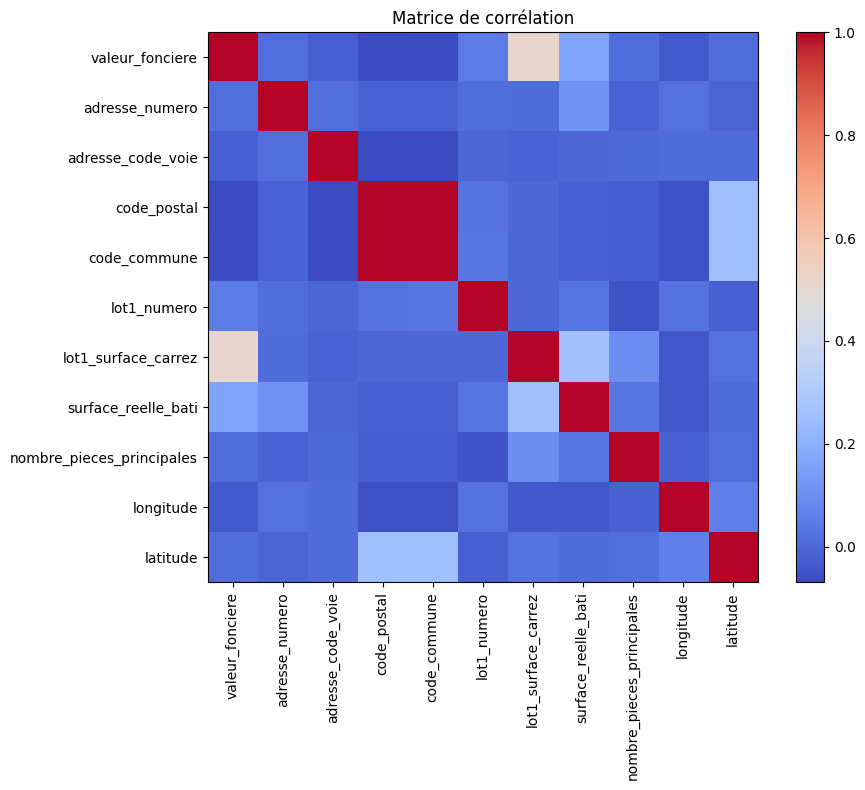

In [55]:
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage 
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

#### Les attributs code cummune et code postal sont les mêmes à un chiffre près on choisit donc de conserver code_postal (code coommune sert pour les services fiscaux)

In [56]:
# on supprime la colonne 'code_commune'
attributs_inutiles = ['code_commune']
df.drop(columns=attributs_inutiles, inplace=True)

df.shape

(303582, 18)

## Partie 1.3 : Analyse des attributs non numériques

#### On analyse maintenant les attributs non numériques pour continuer notre tri vertical (quelles colonnes on garde ou non)

In [57]:
df

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,id_parcelle,lot1_numero,lot1_surface_carrez,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,section_prefixe
0,2022-1640327,2022-01-04,Vente,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,75118000BR0026,55.0,61.00,Dépendance,NaN,0.0,2.348168,48.884490,000BR
1,2022-1640327,2022-01-04,Vente,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,75118000BR0026,25.0,NaN,Appartement,20.0,2.0,2.348168,48.884490,000BR
2,2022-1640327,2022-01-04,Vente,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,75118000BR0026,55.0,61.00,Appartement,25.0,2.0,2.348168,48.884490,000BR
3,2022-1640327,2022-01-04,Vente,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,75118000BR0026,25.0,NaN,Dépendance,NaN,0.0,2.348168,48.884490,000BR
4,2022-1640328,2022-01-06,Vente,605000.0,51.0,RUE CHARLOT,1880.0,75003.0,Paris 3e Arrondissement,75103000AH0072,13.0,NaN,Dépendance,NaN,0.0,2.362871,48.863374,000AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389588,2023-1358922,2023-10-05,Adjudication,147000.0,11.0,RUE DE JAVEL,4843.0,75015.0,Paris 15e Arrondissement,75115000FZ0002,212.0,NaN,Appartement,16.0,1.0,2.280249,48.847277,000FZ
389589,2023-1358923,2023-09-21,Adjudication,70000.0,169.0,BD SAINT GERMAIN,8619.0,75006.0,Paris 6e Arrondissement,75106000BI0040,36.0,NaN,Dépendance,NaN,0.0,2.330998,48.853990,000BI
389590,2023-1358924,2023-09-15,Vente,985708.0,113.0,AV VICTOR HUGO,9761.0,75016.0,Paris 16e Arrondissement,75116000DX0062,120.0,NaN,Dépendance,NaN,0.0,2.283203,48.868047,000DX
389591,2023-1358924,2023-09-15,Vente,985708.0,113.0,AV VICTOR HUGO,9761.0,75016.0,Paris 16e Arrondissement,75116000DX0062,110.0,79.82,Appartement,80.0,4.0,2.283203,48.868047,000DX


In [58]:
# listons les valeurs différentes de "nature_mutation"
df["nature_mutation"].unique()

<StringArray>
[                             'Vente', "Vente en l'état futur d'achèvement",
                       'Adjudication',                            'Echange',
                    'nature_mutation',              'Vente terrain à bâtir',
                      'Expropriation']
Length: 7, dtype: string

#### On ne garde que les ventes, les autres attributs faussant les prix (les échanges sont très souvent à des prix bien inférieurs au marché), on supprime la colonne par la suite

In [59]:
# filtrage du dataframe pour ne conserver que les ventes
df = df[df['nature_mutation'] == 'Vente']

# on supprime ensuite la colonne
df.drop(columns='nature_mutation', inplace = True)

df.shape

/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_29371/811981800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='nature_mutation', inplace = True)


(297337, 17)

#### On ne s'intéresse qu'aux appartements (les prix étant trop différents pour les autres types à l'exception des maisons qui sont-elles trop peu nombreues), on supprime donc les autres type de biens et l'on supprime ensuite la colonne

In [60]:
# filtrage sur les appartements
df = df[df['type_local'] == 'Appartement']

# suppression de la colonne type_local
df.drop(columns='type_local', inplace = True)

df.shape

(145722, 16)

#### On supprime les autres lignes inutiles ou redondantes

In [61]:
colonnes_redondantes_et_inutiles = ['id_mutation','id_parcelle','lot1_numero', 'section_prefixe']
df.drop(columns=colonnes_redondantes_et_inutiles, inplace = True)

df.shape

(145722, 12)

In [62]:
df

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,lot1_surface_carrez,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
1,2022-01-04,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,NaN,20.0,2.0,2.348168,48.884490
2,2022-01-04,580000.0,13.0,RUE DE SOFIA,9002.0,75018.0,Paris 18e Arrondissement,61.00,25.0,2.0,2.348168,48.884490
5,2022-01-06,605000.0,51.0,RUE CHARLOT,1880.0,75003.0,Paris 3e Arrondissement,40.66,42.0,3.0,2.362871,48.863374
9,2022-01-05,716250.0,6.0,RUE PAUL ESCUDIER,7155.0,75009.0,Paris 9e Arrondissement,NaN,69.0,3.0,2.332324,48.880353
12,2022-01-05,320000.0,4.0,RUE DU CHATEAU LANDON,1924.0,75010.0,Paris 10e Arrondissement,NaN,33.0,2.0,2.362613,48.879658
...,...,...,...,...,...,...,...,...,...,...,...,...
389574,2023-11-29,970000.0,18.0,RUE DU RUISSEAU,8436.0,75018.0,Paris 18e Arrondissement,85.05,84.0,4.0,2.340259,48.892260
389577,2023-09-25,80000.0,6.0,BD RICHARD LENOIR,8208.0,75011.0,Paris 11e Arrondissement,NaN,10.0,1.0,2.370190,48.854243
389583,2023-01-30,560000.0,9.0,RUE DEGAS,2643.0,75016.0,Paris 16e Arrondissement,NaN,60.0,3.0,2.274200,48.848819
389586,2023-04-24,1100000.0,13.0,QUAI SAINT MICHEL,8710.0,75005.0,Paris 5e Arrondissement,NaN,96.0,5.0,2.345891,48.853113


## Partie 2 : Tri horizontal du dataset

#### On va d'abbord s'interresser au numéros de rue pour voir si il n'y a pas de valeures aberrantes

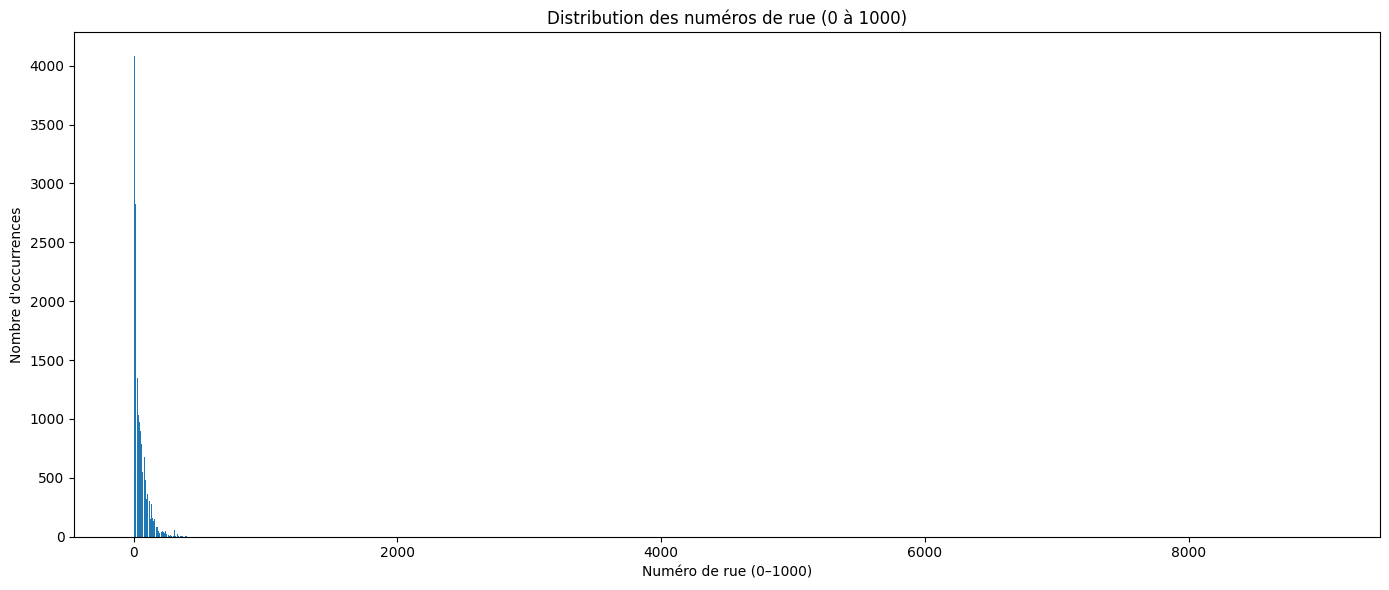

np.float64(9001.0)

In [63]:
# Comptage des occurrences
valeurs = df['adresse_numero'].value_counts().sort_index()

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(valeurs.index, valeurs.values)
plt.xlabel("Numéro de rue (0–1000)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des numéros de rue (0 à 1000)")
plt.tight_layout()
plt.show()

# Valeur max
df['adresse_numero'].max()

#### On a une valeur max à 9000 qui est evidement faussée. On lit sur intnet qu'à Paris les numéros vont de 1 à 407 (rue de Vaugirard), toutes données supérieures sera donc considérée comme aberrante et supprimée.

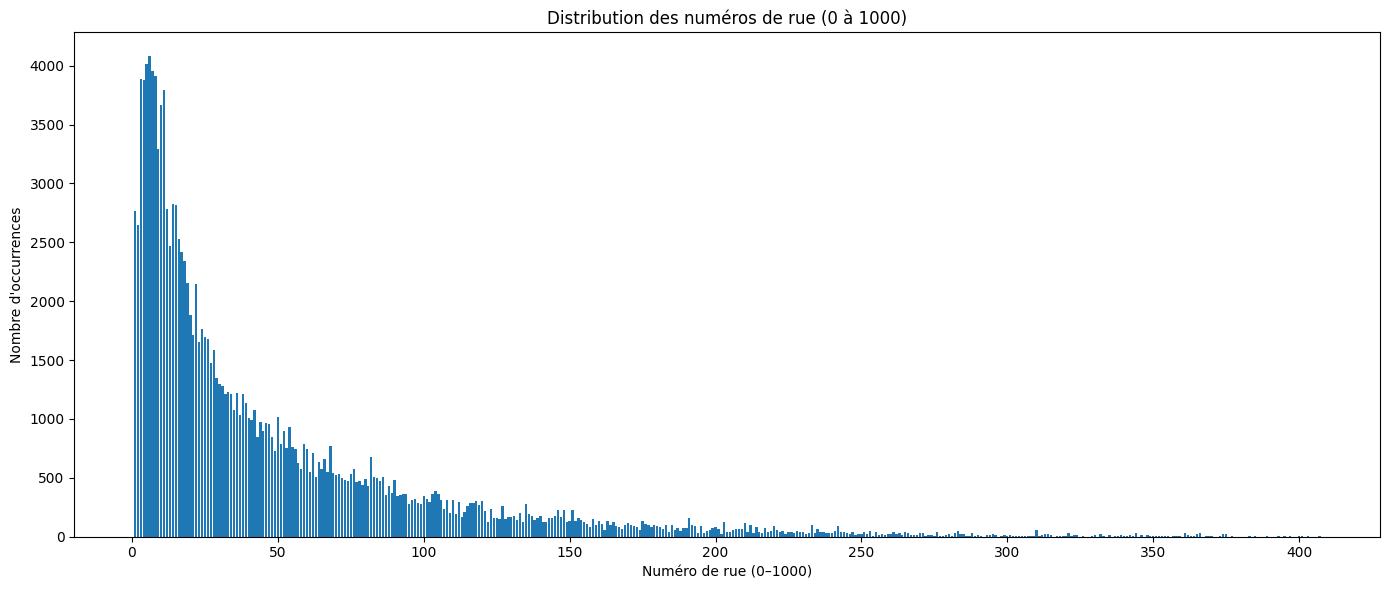

In [64]:
# filtrage des numéros
df = df[df['adresse_numero'] <= 407]

# Comptage des occurrences
valeurs = df['adresse_numero'].value_counts().sort_index()

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(valeurs.index, valeurs.values)
plt.xlabel("Numéro de rue (0–1000)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des numéros de rue (0 à 1000)")
plt.tight_layout()
plt.show()



#### On s'intéresse maintenant à la surface des appartements attribut (lot1_surface_carrez)

In [65]:
print(df["lot1_surface_carrez"].isnull().sum())

70047


#### On a environ 70 000 lignes ou la surface n'est pas indiquée, on les supprimes car essayer de les compléter par diverses techniques fausserait trop les prédictions étant donné que la moitié des données ne seraient pas réélles

In [66]:
# suppresion des données de surface manquantes
df = df.dropna(subset=['lot1_surface_carrez'])

df.shape

(75659, 12)

#### Interressons nous maintenant aux données extrêmes de surfaces

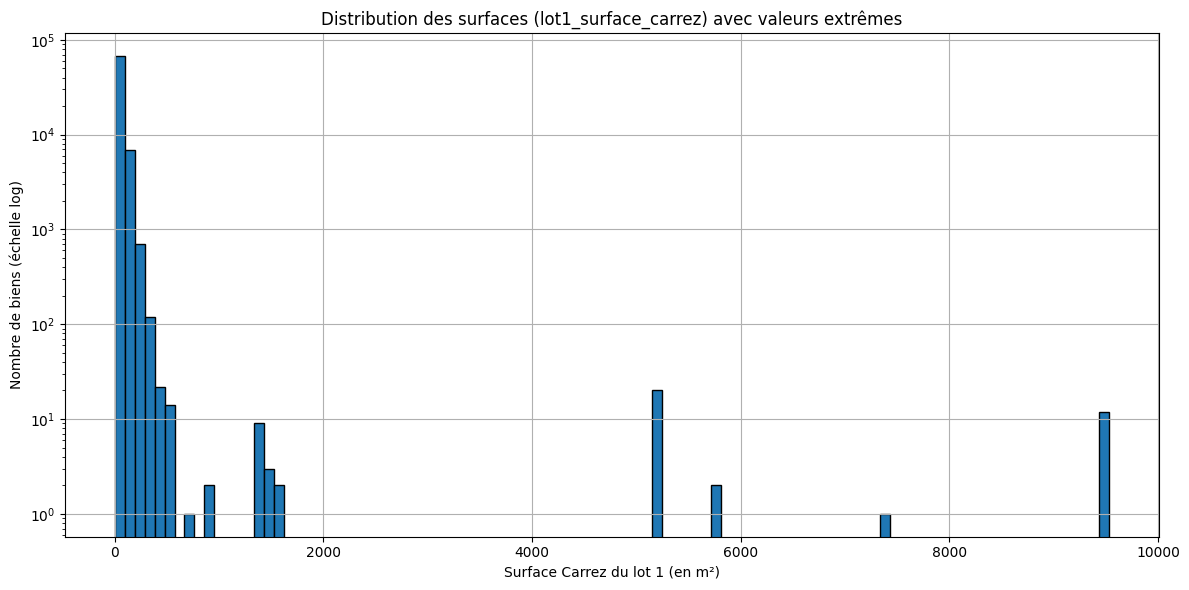

In [67]:
# Histogramme complet avec valeurs extrêmes
plt.figure(figsize=(12, 6))
plt.hist(df['lot1_surface_carrez'], bins=100, edgecolor='black')

# Échelle logarithmique pour bien voir les valeurs extrêmes
plt.yscale('log')

# Titres et axes
plt.xlabel("Surface Carrez du lot 1 (en m²)")
plt.ylabel("Nombre de biens (échelle log)")
plt.title("Distribution des surfaces (lot1_surface_carrez) avec valeurs extrêmes")
plt.grid(True)
plt.tight_layout()
plt.show()

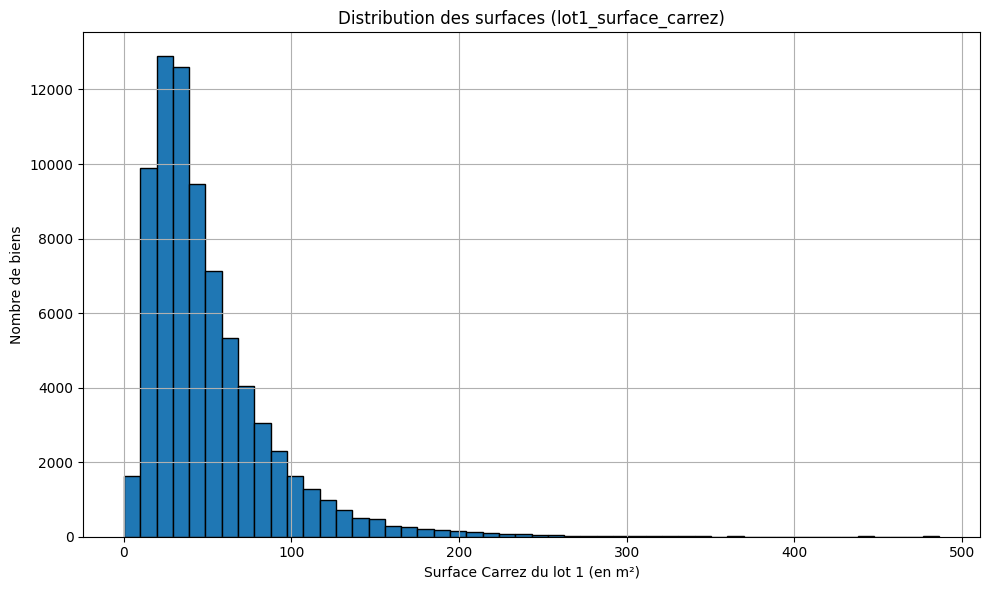

In [68]:
# Filtrage optionnel (pour éviter les valeurs aberrantes > 5000 m² par exemple)
df_filtered = df[df['lot1_surface_carrez'] <= 500]

# Affichage de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['lot1_surface_carrez'], bins=50, edgecolor='black')
plt.xlabel("Surface Carrez du lot 1 (en m²)")
plt.ylabel("Nombre de biens")
plt.title("Distribution des surfaces (lot1_surface_carrez)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### On va donc garder les biens entre 9 et 300 m2, les autres étant soit des valeures abberantes, soit ininterressantes. On pourrait aussi garder les 98% des données du centres ou un autre pourcentage.

In [69]:
#filtrage des données de surface entre 9 et 300 m2
df = df[(df['lot1_surface_carrez'] >= 9) & (df['lot1_surface_carrez'] <= 300)]

df.shape

(74442, 12)

In [70]:
df["lot1_surface_carrez"].describe()

count    74442.000000
mean        50.576260
std         36.358825
min          9.000000
25%         26.070000
50%         40.170000
75%         64.230000
max        299.770000
Name: lot1_surface_carrez, dtype: float64

#### Appliquons le même tri pour les valeures de prix

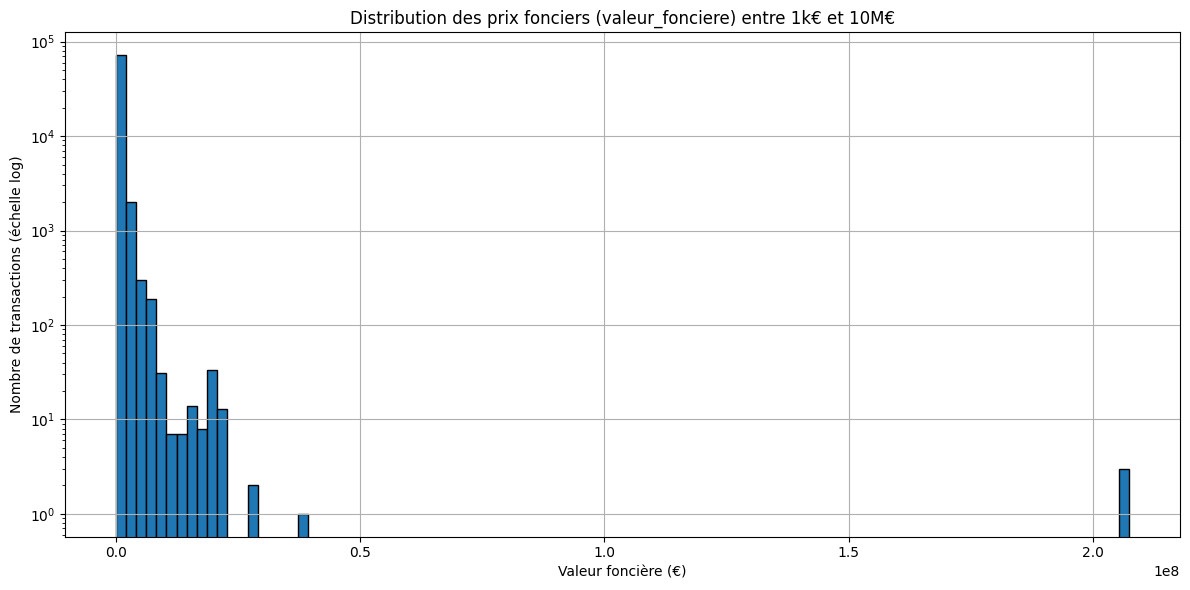

In [71]:
# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df['valeur_fonciere'], bins=100, edgecolor='black')

# Échelle log pour détecter les extrêmes tout en gardant les tendances visibles
plt.yscale('log')

plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions (échelle log)")
plt.title("Distribution des prix fonciers (valeur_fonciere) entre 1k€ et 10M€")
plt.grid(True)
plt.tight_layout()
plt.show()

#### On vois qu'il y a des données dont le prix excède 200 millions d'euros ce qui ne nous intéresse pas, concentrons nous donc sur les données en dessous de 30 millions qui semblent plus réalistes

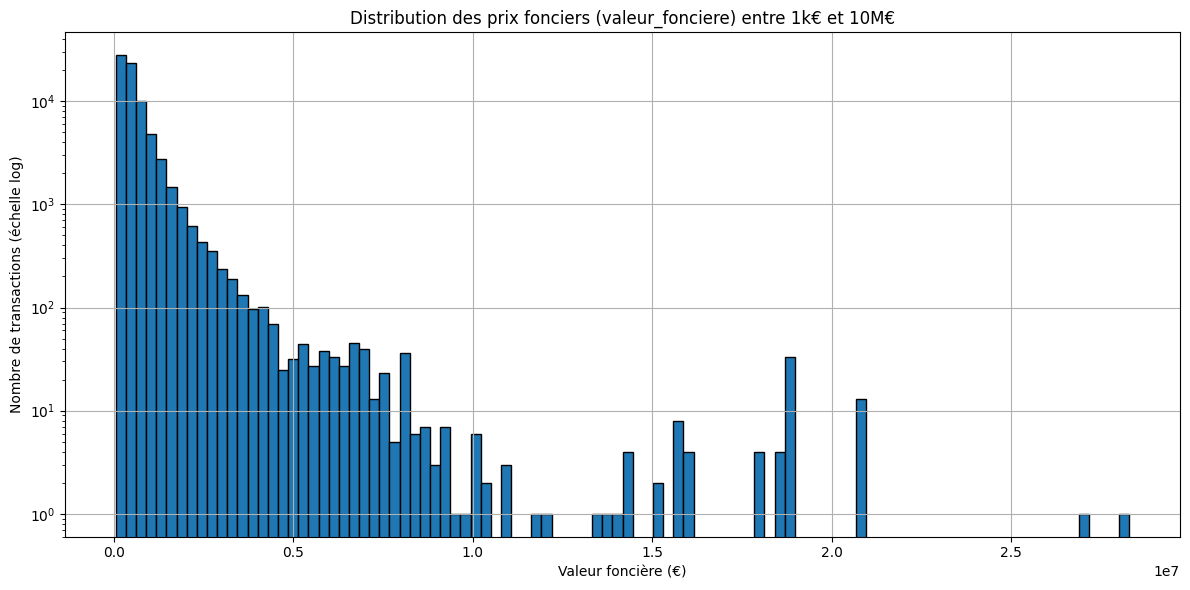

In [72]:
# Filtrage : garder les transactions avec un prix plus realiste
df_filtered = df[
    (df['valeur_fonciere'] >= 50000) & 
    (df['valeur_fonciere'] <= 30_000_000)
]

# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['valeur_fonciere'], bins=100, edgecolor='black')

# Échelle log pour détecter les extrêmes tout en gardant les tendances visibles
plt.yscale('log')

plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions (échelle log)")
plt.title("Distribution des prix fonciers (valeur_fonciere) entre 1k€ et 10M€")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Les données semblent réparties entre 50k euros et 20 millions, supprimons celles qui ne sont pas dans cette plage

In [73]:
# filtrage des données 
df = df[(df['valeur_fonciere'] >= 50_000) & (df['valeur_fonciere'] <= 20_000_000)]

df.shape

(74261, 12)

In [74]:
df["prix_au_m2"] = df["valeur_fonciere"] / df["lot1_surface_carrez"]

df["prix_au_m2"].describe()

count     74261.000000
mean      12519.881587
std       18981.645756
min         614.731195
25%        9161.147903
50%       10591.048855
75%       12295.981590
max      885650.224215
Name: prix_au_m2, dtype: float64

In [75]:
# filtrage des données 
df = df[(df['prix_au_m2'] >= 50_000) & (df['prix_au_m2'] <= 20_000_000)]


#### Regardons maintenant la donnée nombre de pièce

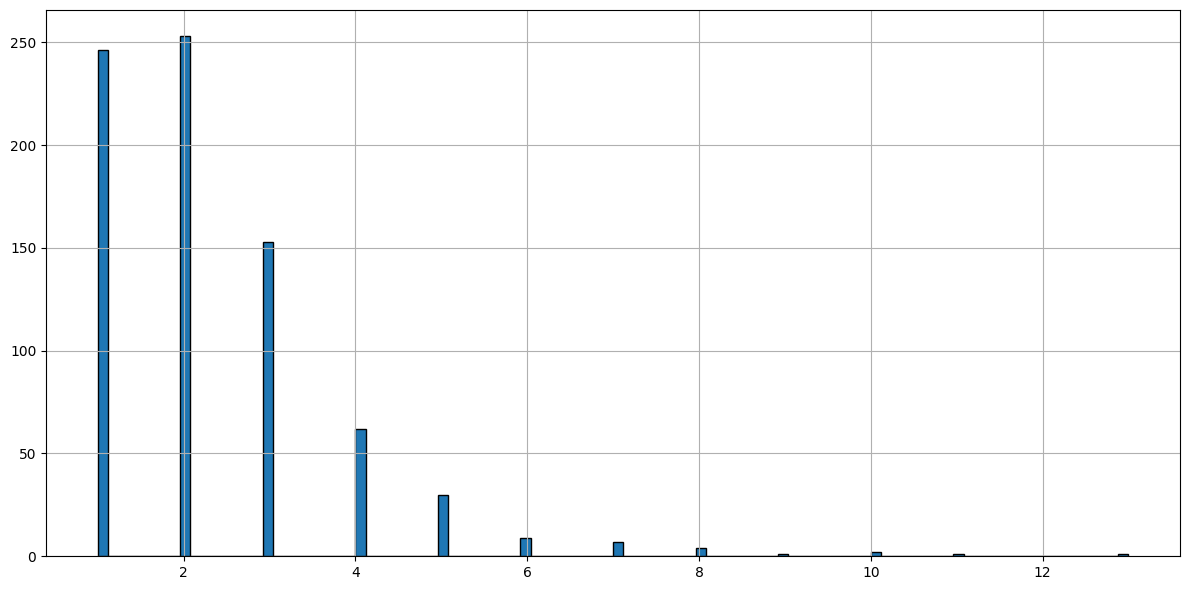

In [76]:
# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df['nombre_pieces_principales'], bins=100, edgecolor='black')

plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# regardons toutes les valeures différentes
df['nombre_pieces_principales'].unique()

array([ 4.,  6.,  2.,  3.,  1.,  8.,  5., 11.,  7., 13., 10.,  9.])

In [78]:
valeurs_anormales = [0, 7, 8, 9, 10, 11, 12, 13, 34]
df_filtre = df[df['nombre_pieces_principales'].isin(valeurs_anormales)]

df_filtre

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,lot1_surface_carrez,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_au_m2
11094,2022-07-12,3883250.0,4.0,RUE DE LOGELBACH,5726.0,75017.0,Paris 17e Arrondissement,9.14,294.0,8.0,2.308705,48.881382,424863.238512
54184,2024-06-24,9075000.0,8.0,RUE DE PRESBOURG,7798.0,75016.0,Paris 16e Arrondissement,60.00,367.0,11.0,2.293531,48.872902,151250.000000
62479,2024-09-05,18000000.0,51.0,RUE DE BABYLONE,618.0,75007.0,Paris 7e Arrondissement,249.33,224.0,7.0,2.317540,48.851297,72193.478522
82768,2024-07-01,3010100.0,2.0,VLA NIEL,6774.0,75017.0,Paris 17e Arrondissement,10.47,280.0,7.0,2.295814,48.881164,287497.612225
89306,2020-01-14,7050000.0,26.0,RUE CAMBON,1449.0,75001.0,Paris 1er Arrondissement,122.56,310.0,7.0,2.327093,48.867873,57522.845953
124838,2021-03-25,2600000.0,6.0,PL SAINT SULPICE,8771.0,75006.0,Paris 6e Arrondissement,37.20,13.0,13.0,2.334089,48.851673,69892.473118
131459,2021-07-02,8570000.0,10.0,AV FREDERIC LE PLAY,3838.0,75007.0,Paris 7e Arrondissement,12.30,421.0,10.0,2.303795,48.854143,696747.967480
168350,2024-09-05,18000000.0,51.0,RUE DE BABYLONE,618.0,75007.0,Paris 7e Arrondissement,249.33,224.0,7.0,2.317540,48.851297,72193.478522
198646,2020-01-22,8577713.0,104.0,RUE DU BAC,620.0,75007.0,Paris 7e Arrondissement,20.55,289.0,7.0,2.323299,48.853710,417406.958637
207568,2021-07-02,8570000.0,10.0,AV FREDERIC LE PLAY,3838.0,75007.0,Paris 7e Arrondissement,12.30,421.0,10.0,2.303795,48.854143,696747.967480


#### On décide de garder ces données en remplaçant le chiffre par une estimation du nombre de pièces pour ces données.

In [79]:
# si le nombre de pièce est dans valeures anormales, alors on regarde si il est possible (par exemple 11 pièces pour 280m2 est réaliste),
# et on remplace par une estimation si impossible
for index, row in df.iterrows():
    if row['nombre_pieces_principales'] in valeurs_anormales:
        if row['nombre_pieces_principales'] == 0 :
            df.at[index, 'nombre_pieces_principales'] = round(row['lot1_surface_carrez'] / 12)
        else : 
            if (row['lot1_surface_carrez']/row['nombre_pieces_principales']) < 7 or (row['lot1_surface_carrez']/row['nombre_pieces_principales']) > 25 : 
                if pd.notna(row['lot1_surface_carrez']) and round(row['lot1_surface_carrez'] / 12) != 0:
                    df.at[index, 'nombre_pieces_principales'] = round(row['lot1_surface_carrez'] / 12)
                else:
                    df.at[index, 'nombre_pieces_principales'] = 0


#### On supprime le code_postal qui est parfaitement corrélé avec l'arrondissement, on créée la colonne pric_au_m2 qui est simplement le prix au mètre carré

In [80]:
#df.drop(columns='code_postal', inplace = True)

df["prix_au_m2"] = df["valeur_fonciere"] / df["lot1_surface_carrez"]

df.drop(columns='valeur_fonciere', inplace = True)

#### On transforme enfin la date en datetime, on ne conserve que l'année

In [81]:
# Conversion en datetime si ce n'est pas déjà fait
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Extraire seulement l'année (en tant qu'entier)
df['année'] = df['date_mutation'].dt.year

In [ ]:
# Convertir en entier puis extraire les deux derniers chiffres
df['arrondissement'] = df['code_postal'].astype(int) % 100

df.drop(columns="code_postal", inplace=True)
df.drop(columns='nom_commune', inplace=True)

#### On supprime maintenant toutes les lignes où au moins une valeur est nulle

In [82]:
df_last_version = df.dropna()
df_last_version

,date_mutation,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,lot1_surface_carrez,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_au_m2,année
1962,2022-01-31,16.0,QUAI D ORLEANS,6936.0,75004.0,Paris 4e Arrondissement,187.40,150.0,4.0,2.354945,48.851726,98719.316969,2022
1963,2022-01-31,16.0,QUAI D ORLEANS,6936.0,75004.0,Paris 4e Arrondissement,186.00,188.0,6.0,2.354945,48.851726,99462.365591,2022
1966,2022-01-31,16.0,QUAI D ORLEANS,6936.0,75004.0,Paris 4e Arrondissement,64.40,63.0,2.0,2.354945,48.851726,287267.080745,2022
1967,2022-01-31,16.0,QUAI D ORLEANS,6936.0,75004.0,Paris 4e Arrondissement,64.20,60.0,3.0,2.354945,48.851726,288161.993769,2022
2868,2022-02-01,17.0,RUE BOUCRY,1139.0,75018.0,Paris 18e Arrondissement,19.15,24.0,1.0,2.361522,48.894019,57441.253264,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385860,2023-09-29,97.0,RUE DU BAC,620.0,75007.0,Paris 7e Arrondissement,34.33,35.0,2.0,2.324370,48.853307,101951.645791,2023
386250,2023-10-06,14.0,RUE DE L ABBAYE,2.0,75006.0,Paris 6e Arrondissement,20.75,30.0,1.0,2.334280,48.854636,113253.012048,2023
386631,2023-10-27,1.0,RUE VOLTAIRE,9912.0,75011.0,Paris 11e Arrondissement,15.60,27.0,1.0,2.389804,48.852295,69230.769231,2023
387027,2023-10-25,21.0,AV DE SEGUR,8909.0,75007.0,Paris 7e Arrondissement,49.10,48.0,2.0,2.310140,48.851295,120592.668024,2023


In [83]:
# On exporte au format csv pour l'utiliser pour l'entrainement
df_last_version.to_csv("../data/data_cleaned.csv", index=False)